In [85]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install phik
import phik

In [35]:
df = pd.read_csv("ds_salaries.csv")

In [36]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [38]:
print(df)

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence

In [39]:
#проверим, есть ли у нас пропущенные значения
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [40]:
#count: Количество непропущенных значений.
#mean: Среднее значение.
#std: Стандартное отклонение.
#min: Минимальное значение.
#25%: 25-й процентиль (нижний квартиль).
#50%: Медиана (50-й процентиль).
#75%: 75-й процентиль (верхний квартиль).
#max: Максимальное значение.
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [41]:
# Проверка на дубликаты
duplicates = df.duplicated().sum()
print("Наличие дубликатов", duplicates)

# Удаление дубликатов
df = df.drop_duplicates()

print("\nДатасет без дубликатов:\n", df)


Наличие дубликатов 1171

Датасет без дубликатов:
       work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [86]:
#Определение самых высокооплачиваемых должностей
highest_paid_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
print("Самые высокооплачиваемые должности:")
print(highest_paid_jobs.head(10))

#Определение выбросов в зарплате (используем межквартильный диапазон (IQR))
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

#Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#выбросы
outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]

#группируем по должностям и считаем количество выбросов
outlier_jobs = outliers['job_title'].value_counts()
print("\nДолжности с выбросами в зарплате:")
print(outlier_jobs)


Самые высокооплачиваемые должности:
job_title
Data Science Tech Lead                 375000.000000
Cloud Data Architect                   250000.000000
Data Lead                              212500.000000
Data Analytics Lead                    211254.500000
Principal Data Scientist               198171.125000
Director of Data Science               195140.727273
Principal Data Engineer                192500.000000
Machine Learning Software Engineer     192420.000000
Applied Scientist                      190342.580645
Principal Machine Learning Engineer    190000.000000
Name: salary_in_usd, dtype: float64

Должности с выбросами в зарплате:
job_title
Data Scientist                        4
Research Scientist                    3
Machine Learning Engineer             3
Data Analyst                          2
Director of Data Science              2
Data Architect                        2
Data Engineer                         2
Data Science Tech Lead                1
Principal Data Scientis

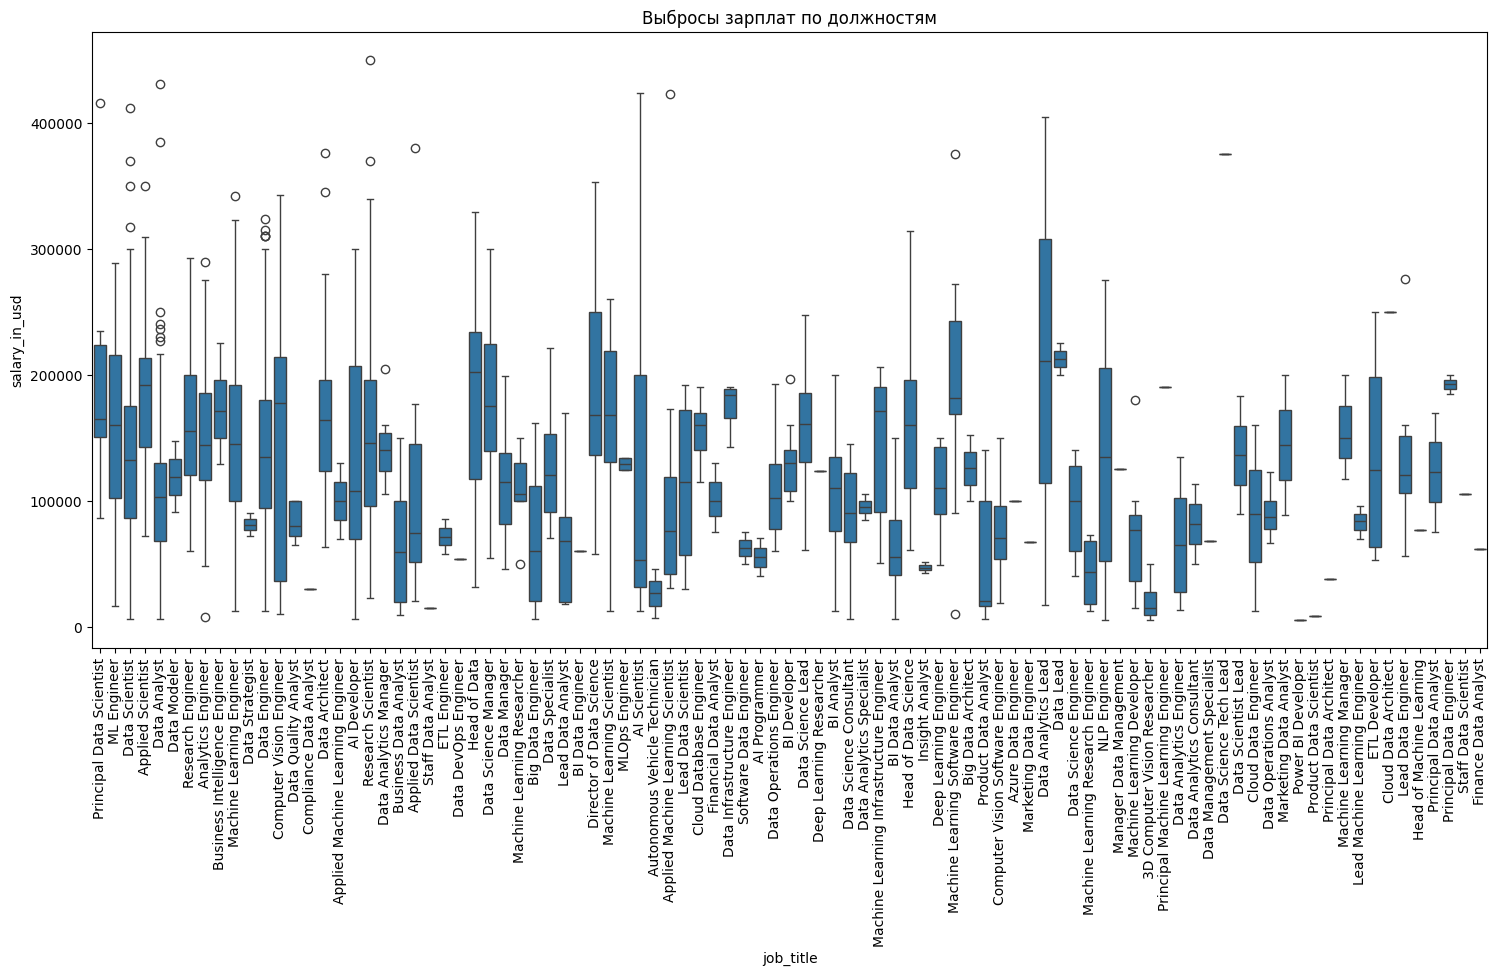

In [87]:
#Боксплот для выявления выбросов
plt.figure(figsize=(18, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=df)
plt.xticks(rotation=90)
plt.title('Выбросы зарплат по должностям')
plt.show()


In [88]:
#Влияет ли удаленная работа на зарплату?
# Есть ли корреляция?
remote_salary = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
print(remote_salary)

  employment_type  salary_in_usd
0              CT  113446.900000
1              FL   51807.800000
2              FT  134434.613271
3              PT   39533.705882


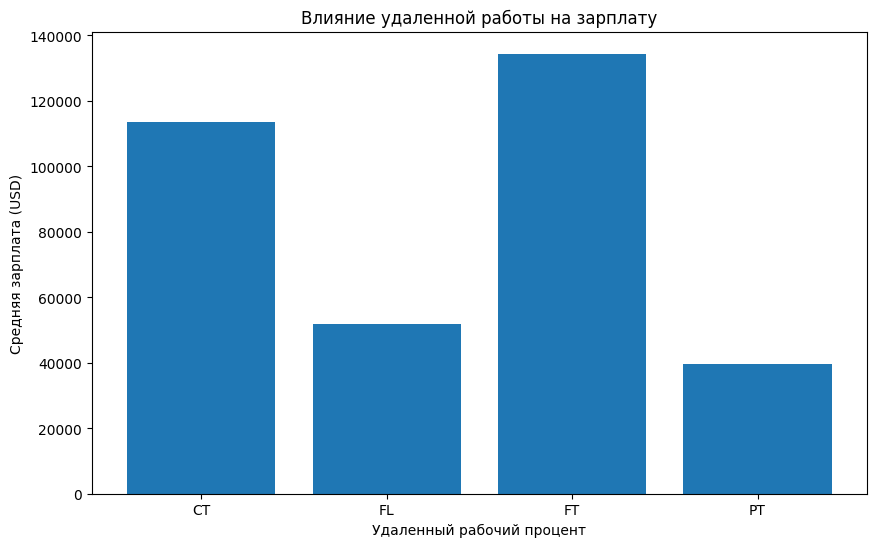

In [89]:
plt.figure(figsize=(10, 6))
plt.bar(remote_salary['employment_type'], remote_salary['salary_in_usd'])
plt.xlabel('Удаленный рабочий процент')
plt.ylabel('Средняя зарплата (USD)')
plt.title('Влияние удаленной работы на зарплату')
plt.show()

In [90]:
# Преобразование категориальной переменной employment_type в числовые значения
df['employment_type_numeric'] = pd.Categorical(df['employment_type']).codes
correlation = df['employment_type_numeric'].corr(df['salary_in_usd'])
print(f"Корреляция между типом занятости и зарплатой в USD: {correlation}")

Корреляция между типом занятости и зарплатой в USD: -0.013634709363604362


In [91]:
# Зависит ли заработная плата от размера предприятия? нет
salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().reset_index()
print(salary_by_company_size)

  company_size  salary_in_usd
0            L  113202.239609
1            M  141474.514300
2            S   78364.278912


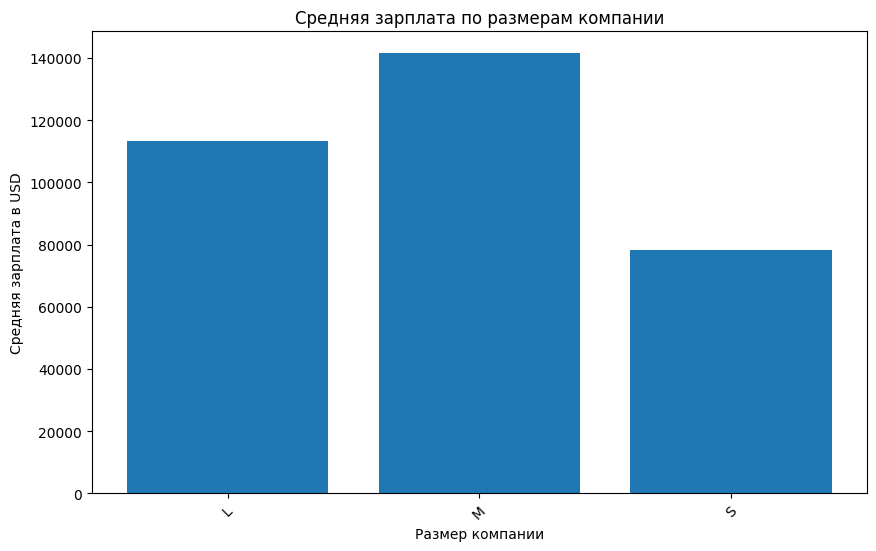

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(salary_by_company_size['company_size'], salary_by_company_size['salary_in_usd'])
plt.xlabel('Размер компании')
plt.ylabel('Средняя зарплата в USD')
plt.title('Средняя зарплата по размерам компании')
plt.xticks(rotation=45)
plt.show()

In [54]:
#Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?
# Подсчет количества вакансий по странам
country_counts = df['employee_residence'].value_counts()
print(country_counts)

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64


In [55]:
# Средняя зарплата по странам
average_salary_by_country = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)
print(average_salary_by_country)

employee_residence
IL    423834.000000
MY    200000.000000
PR    166000.000000
US    153972.206550
CA    130859.839506
          ...      
MD     18000.000000
ID     15000.000000
SK     12608.000000
MA     10000.000000
MK      6304.000000
Name: salary_in_usd, Length: 78, dtype: float64


In [56]:
#объединяем результаты  в один DataFrame
country_analysis = pd.DataFrame({
    'job_count': country_counts,
    'average_salary': average_salary_by_country
}).fillna(0)
#сортируем по количеству вакансий и зарплате
country_analysis = country_analysis.sort_values(by=['job_count', 'average_salary'], ascending=[False, False])
print(country_analysis)

                    job_count  average_salary
employee_residence                           
US                       1893   153972.206550
GB                        150    87820.906667
CA                         81   130859.839506
IN                         70    36543.100000
DE                         47    94858.170213
...                       ...             ...
MD                          1    18000.000000
ID                          1    15000.000000
SK                          1    12608.000000
MA                          1    10000.000000
MK                          1     6304.000000

[78 rows x 2 columns]


In [57]:
#Оцените медианную зарплату для каждой должности.
median_salary_by_job = df.groupby('job_title')['salary_in_usd'].median()
print(median_salary_by_job)

job_title
3D Computer Vision Researcher     15000.0
AI Developer                     108000.0
AI Programmer                     55000.0
AI Scientist                      52500.0
Analytics Engineer               143860.0
                                   ...   
Research Engineer                155000.0
Research Scientist               145900.0
Software Data Engineer            62510.0
Staff Data Analyst                15000.0
Staff Data Scientist             105000.0
Name: salary_in_usd, Length: 93, dtype: float64


In [59]:
#Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?
data_filtered = df[df['work_year'].isin([2020, 2023])]
#Группировка и расчет средней зарплаты
average_salaries = data_filtered.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().unstack()
#Изменение зарплат
salary_change = average_salaries.loc[:, 2023] - average_salaries.loc[:, 2020]
#Результаты
higher_paid = salary_change[salary_change > 0]
lower_paid = salary_change[salary_change < 0]

print("Должности с повышением зарплаты:")
print(higher_paid)
print("\nДолжности с понижением зарплаты:")
print(lower_paid)

Должности с повышением зарплаты:
job_title
AI Scientist                                185336.500000
Computer Vision Engineer                    164240.000000
Data Analyst                                 70595.538462
Data Engineer                                71133.328465
Data Science Consultant                      42568.357143
Data Scientist                               65977.296818
ML Engineer                                 153071.785714
Machine Learning Engineer                    20442.354369
Machine Learning Infrastructure Engineer    106064.166667
Product Data Analyst                          3378.000000
dtype: float64

Должности с понижением зарплаты:
job_title
BI Data Analyst              -26103.000000
Big Data Engineer             -8545.833333
Business Data Analyst        -63554.000000
Data Science Manager         -11412.437500
Director of Data Science     -82271.333333
Lead Data Analyst            -43881.000000
Machine Learning Scientist   -65531.250000
Principal Data Sc

In [64]:
#Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.
max_salary_row = df.loc[df['salary_in_usd'].idxmax()]
most_successful_worker = {
    'job_title': max_salary_row['job_title'],
    'employee_residence': max_salary_row['employee_residence'],
    'employment_type': max_salary_row['employment_type']
}
print("Портрет самого успешного работника:")
print(f"Должность: {most_successful_worker['job_title']}")
print(f"Страна проживания: {most_successful_worker['employee_residence']}")
print(f"Удаленная работа: {'Да' if most_successful_worker['employment_type'] =='FL' else 'Нет'}")

Портрет самого успешного работника:
Должность: Research Scientist
Страна проживания: US
Удаленная работа: Нет


In [84]:
#Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?
# 1. Подсчет количества сотрудников по странам проживания и месту работы
residence_count = df['employee_residence'].value_counts().sort_values(ascending=False)
employment_count = df['company_location'].value_counts().sort_values(ascending=False)

# 2. Определение количества людей, которые работают и проживают в разных регионах
different_location = df[df['employee_residence'] != df['company_location']]

# 3. Группировка для анализа пересечения мест проживания и мест работы
combined = df.groupby(['employee_residence', 'company_location']).size().reset_index(name='count')

# 4. Определение доли удаленных сотрудников
fl_count = df[df['employment_type'] == 'FL'].groupby('employee_residence').size()
total_count = df.groupby('employee_residence').size()
remote_percentage = (fl_count / total_count * 100).sort_values(ascending=False).head()

# 5. Результаты
print("Количество сотрудников по странам проживания:")
print(residence_count)
print("\nКоличество сотрудников по странам работы:")
print(employment_count)
print("\nСотрудники, работающие в другой стране, чем проживают:")
print(different_location[['employee_residence', 'company_location']].head())
print("\nПроцент удаленных сотрудников по странам:")
print(remote_percentage.sort_values(ascending=False).head())


Количество сотрудников по странам проживания:
employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
MY       1
JE       1
NZ       1
DZ       1
MT       1
Name: count, Length: 78, dtype: int64

Количество сотрудников по странам работы:
company_location
US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
NZ       1
CL       1
MD       1
EG       1
MT       1
Name: count, Length: 72, dtype: int64

Сотрудники, работающие в другой стране, чем проживают:
    employee_residence company_location
81                  PT               US
82                  IN               DE
183                 NG               CA
218                 AU               FI
249                 ES               GB

Процент удаленных сотрудников по странам:
employee_residence
IR    100.0
AS     50.0
RU     25.0
UA     25.0
BE     20.0
dtype: float64
